<a href="https://colab.research.google.com/github/KettoMisaell/Analisis-Descriptivo/blob/main/SE%C3%91AL_ANALITICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SEÑAL ANALITICA PARA DATOS DE UN ATAQUE EPILEPTICO**

La señal analítica de una serie es una representación matemática que se utiliza para descomponer una señal en sus componentes de frecuencia. Esta descomposición es útil en varias aplicaciones, como el análisis de señales, el procesamiento de señales y la modulación.

En este pequeño proyecto se trabajará con un Data Frame de 19 columnas dónde cada una representa un sensor colocado en distintas zonas del cerebro de una persona con epilepsia. Se visualizará la señal anallitíca del sensor Fp1 durante una parte del ataque epileptico.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats      
import scipy.optimize
import scipy.signal as signal
from scipy.signal import hilbert

In [2]:
df = pd.read_csv('/content/Sz03_U.csv')

In [3]:
df

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,Fz,Cz,Pz
0,2.470760,-14.7682,2.756470,-1.150410,-2.167560,0.139706,2.691040,2.21281,4.237460,3.37284,0.873485,-3.72717,-0.344269,-3.56245,1.323770,5.39534,-0.488526,-2.364320,-0.221078
1,2.305160,-16.2133,2.027550,-0.988894,-2.377480,1.405820,1.336450,2.44995,3.016020,3.96405,-0.206471,-3.35766,-1.768500,-2.81727,-0.402713,7.63291,-0.189645,-0.972122,0.878531
2,1.853440,-20.4762,1.080130,-1.211650,-2.175810,2.030670,-0.007995,2.45496,1.529330,4.17721,-0.882199,-2.96601,-2.592090,-2.06809,-2.049980,9.15823,-0.318212,0.392741,1.851900
3,1.148100,-26.6865,0.093815,-1.959250,-1.681740,1.746020,-1.153400,2.11109,0.097995,3.96654,-1.073040,-2.54959,-2.714390,-1.60420,-3.476590,9.63761,-0.926837,1.239080,2.639350
4,0.384279,-33.2634,-0.655388,-2.952690,-1.034940,0.764914,-1.908670,1.36668,-1.000720,3.40248,-0.855347,-2.09211,-2.226320,-1.56512,-4.582050,9.05316,-1.710430,1.409790,3.301810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,-2.304510,-17.1264,-0.449811,-6.826590,-0.591737,-3.913150,-1.548480,10.15320,8.748990,10.35380,8.831500,10.04900,8.675360,16.44750,8.939640,1.88782,-1.069720,-5.531100,-0.222166
299996,-2.133960,-17.3390,0.671029,-8.189120,0.689962,-4.461000,0.184713,11.71650,11.390500,13.07500,9.915010,9.92351,10.744000,16.77640,11.638500,2.22963,-2.782020,-6.078780,0.816846
299997,-1.843800,-16.9469,1.273690,-9.497390,1.779810,-4.711210,1.310500,12.87810,12.949500,14.92100,10.642000,9.97972,12.189800,17.30380,13.457900,2.13715,-4.432160,-6.437160,1.216230
299998,-1.316890,-15.9210,1.367390,-10.499400,2.430280,-4.575630,1.508150,13.86050,13.230200,15.79530,11.032100,10.48740,13.015900,18.22790,14.041700,1.81425,-5.865280,-6.708610,0.794684


Se importa 'hilbert()' de la libreria scipy.signal y se aplica al primer canal, esto nos devolverá la señal analitica con la parte imaginaria igual a la transformada de Hilbert.

In [3]:
from scipy.signal import hilbert
x_hilbert = hilbert(df.Fp1)

In [ ]:
x_hilbert

array([ 2.47076 -8.26973086j,  2.30516 -5.64688702j,
        1.85344 -4.89069292j, ..., -1.8438  -8.09196977j,
       -1.31689 -8.06293973j, -0.540754-9.27168087j])

Se divide en su parte real e imaginaria.

In [4]:
x_real = np.real(x_hilbert)
x_imag = np.imag(x_hilbert)

Si se visualiza el canal 1 se nota como la parte real de la señal analitica coincide identicamente con lo señal original.

In [19]:
df.Fp1

0         2.470760
1         2.305160
2         1.853440
3         1.148100
4         0.384279
            ...   
299995   -2.304510
299996   -2.133960
299997   -1.843800
299998   -1.316890
299999   -0.540754
Name: Fp1, Length: 300000, dtype: float64

Se crea un Plot de la la señal original y su transformada de Hilbert.

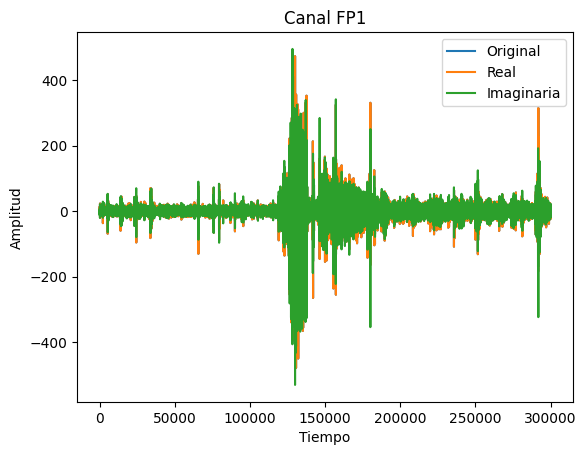

In [5]:
n = 120000
m = 136000
# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar las tres señales en la misma gráfica
ax.plot(df.Fp1, label = 'Original')
plt.legend()
ax.plot(x_imag, label = 'Transformada' )
plt.legend()

ax.set_title("Canal FP1")
ax.set_xlabel('Tiempo')
ax.set_ylabel('Amplitud')

# Mostrar el gráfico
plt.show()

# Señal analitica canal Fp1 

Para graficar la señal analitica primero obtenemos la fase de cada numero complejo que contiene la transformada así cómo su norma.

In [6]:
phase = np.angle(x_hilbert)
norma = np.abs(x_hilbert)

In [26]:
angulos = np.degrees(phase)

Se gráfica la señal analitica en una ventana de 5 segundos que es dónde apróximadamente ocurre el ataque epiléptico.

<ipython-input-7-b3078924e154>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '45', '90', '135', '180', '-135', '-90', '-45'])


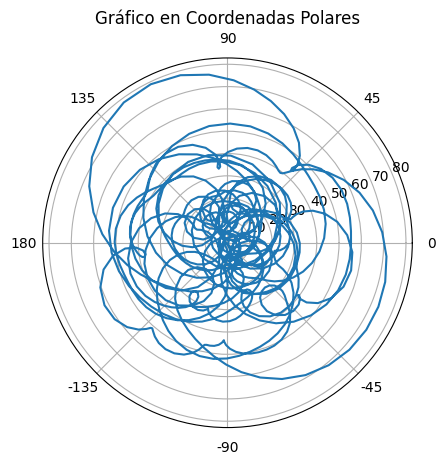

In [7]:
srate = 200 #Número de registros por segundo
n = srate * 600 #Indice del inicio del ataque
m = srate * 605 #Indice del fin del ataque 
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}) #Gráfica en coordenadas polares 
ax.plot(phase[n:m], norma[n:m])

# Agregar etiquetas y título
ax.set_xticklabels(['0', '45', '90', '135', '180', '-135', '-90', '-45'])
ax.set_title('Gráfico en Coordenadas Polares')
plt.show()

Junto todos los procesos anteriores en una función llamada 'hilb'.

In [28]:
def hilb(senal, srate, x):
  z = 5/x
  #Se obtiene la transformada de hilbert
  x_hilbert = hilbert(senal)
  #Se obtienen dos arrays con la parte imaginaria y real
  x_real = np.real(x_hilbert)
  x_imag = np.imag(x_hilbert)
  #Se obtiene la fase y la norma (el angulo y el radio) para graficar en coordenadas polares
  phase = np.angle(x_hilbert)
  norma = np.abs(x_hilbert)
  #Se grafica 
  #srate = 200
  n = srate * 600
  m = round(srate * (z + 600))
  fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
  ax.plot(phase[n:m], norma[n:m])

  # Agregar etiquetas y título
  ax.set_xticklabels(['0', '45', '90', '135', '180', '-135', '-90', '-45'])
  ax.set_title("Grafico en coordendas polares")
  plt.show()
  print(z)


Una función donde se filtra la señal por bandas.

In [9]:
bandas = [0, 3.5, 7.5, 12.5, 25]
def filtro(senal, banda2, banda1, srate):
  srate = 200
  order = 4
  b, a = signal.butter(order, banda2/(0.5*srate), 'lowpass')   #Configuration filter 8 representa el orden del filtro
  data_in = signal.filtfilt(b, a, senal)  #data es la señal a filtrar

  d, c = signal.butter(order, banda1/(0.5*srate), 'highpass')   #Configuration filter 8 representa el orden del filtrar
  data_fil = signal.filtfilt(d, c, data_in)  #data es la señal a filtrar
  return(data_fil)


Se crea una lista 't' en dónde se guardarán todas las señales filtradas en las distintas bandas de frecuencia, estas bandas se declararon previamente y se recorren en un ciclo for.

In [18]:
t = []
for i in range(len(bandas) - 1): 
  sinal = filtro(df.Fp1, bandas[i + 1], bandas[i], 200 )
  t.append(sinal)


Con las señales filtradas en una lista se pasa cada una en la función 'hilb'.

<ipython-input-5-9f744e77af17>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '45', '90', '135', '180', '-135', '-90', '-45'])


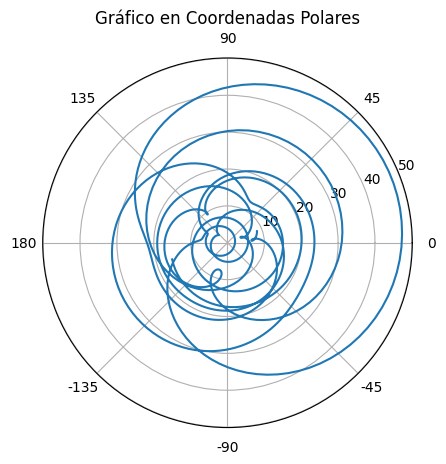

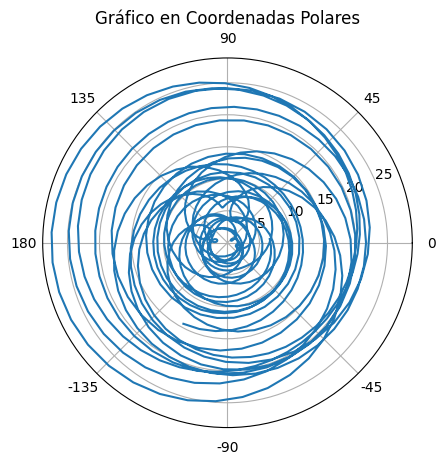

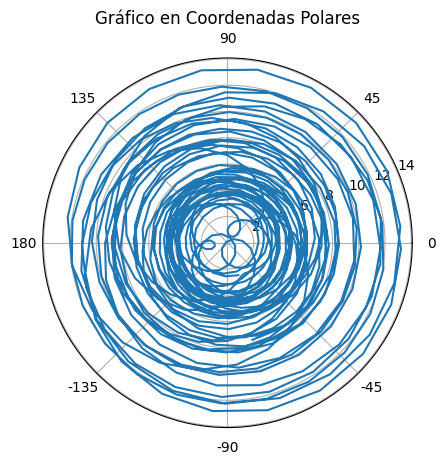

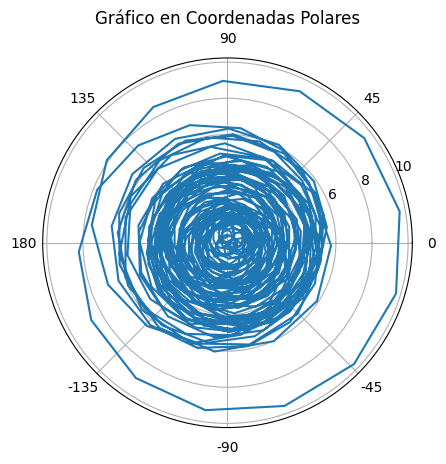

In [14]:
for i in t: 
  hilb(i, 200)

Aquí se requiere declarar 3 bandas, de 1 a 5, de 11 a 15 y de 21 a 25 (Hz), y que sólamente pase 5 veces la frecuencia más baja de cada banda, para esto se tienen que reducir las ventanas de tiempo y esto se hace dando cómo entrada la frecuencia más baja de cada banda en el párametro 'x' de la función 'hilb' y encontrando el indice en el que se tiene que detener con la variable 'z' dentro de la misma función (Se modificó la función original).

In [12]:
#Antes se ocuparan para filtrar en la funcion de filtro
bandas_min = [1, 11, 21]
bandas_max = [5, 15, 25]
t = []
for i in range(len(bandas_min)): 
  sinal = filtro(df.Fp1, bandas_max[i], bandas_min[i], 200 )
  t.append(sinal)

<ipython-input-28-73702a1efb5d>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '45', '90', '135', '180', '-135', '-90', '-45'])


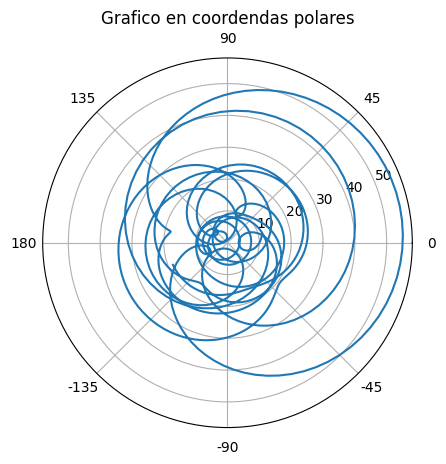

5.0


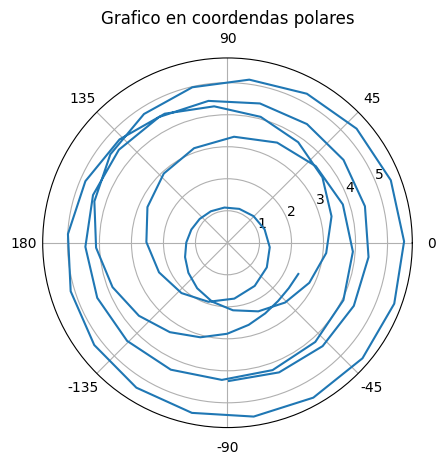

0.45454545454545453


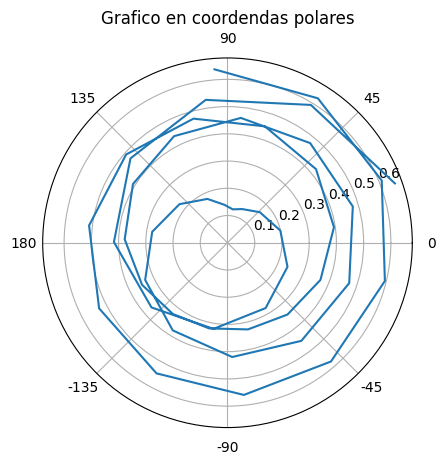

0.23809523809523808


In [29]:
#Se convierten las listas en arrays y se vuelve a iterar para pasar el nuevo parametro a la funcion 'hilb'este nuevo sera la frecuencia minima de cada banda
t = np.array(t)
bandas_min = np.array(bandas_min)
for i in range(3): 
  hilb(t[i], 200, bandas_min[i])

Se puede notar que la señal analitica está parcialmente bien definida, pues se nota una clara oscilación alrededor del centro, especialmente cuando se ajustan las ventanas para un número de oscilaciones bajas en las bandas de frecuencias altas, esto porque para una señal analitica bien definida se necesita un espectro de potencias con un pico predominante, por lo que nos ayudan los filtros. 